# Own model: KNN
As we discussed previously we will be making a KNN-model for our "own model", since it also performed pretty well according to Pycaret.

## Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

## Load data
In this file we also load the data from our training-data and the test-data. We use the test-data as well, because we are going to show some statistics in this file

In [13]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

## Training
Since this model trains very fast we can quickly check how many neighbours we can best use. For that we have the following code and graph afterwards.

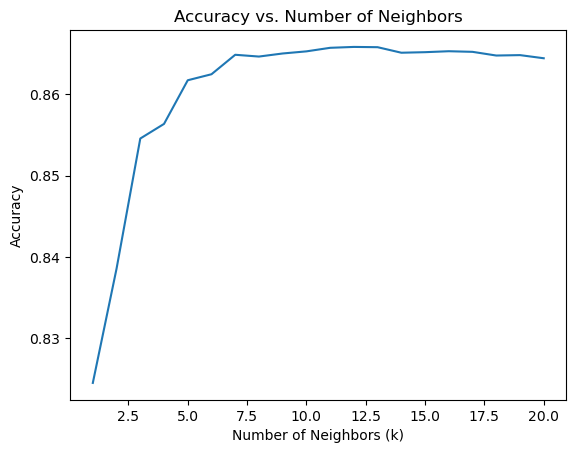

In [14]:
accuracy_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    # the following part might seem weird, .values makes it a np array and then .ravel allows for it to be used in the .fit-method
    knn.fit(x_train, y_train.values.ravel())
    y_pred = knn.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

As we have seen the it stagnates after about 7, so we will use 7 for our amount of neighbours.

In [15]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=7)

## Save the model

In [16]:
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

print("saved model")

saved model


## Evaluation
We will also show a few metrics to see how good this model actually is.

In [17]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     81129
           1       0.81      0.75      0.78     38117

    accuracy                           0.86    119246
   macro avg       0.85      0.83      0.84    119246
weighted avg       0.86      0.86      0.86    119246



In [18]:
y_pred = [0 if x < 0.70 else 1 for x in y_pred]

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[74503  6626]
 [ 9493 28624]]
